# Q1

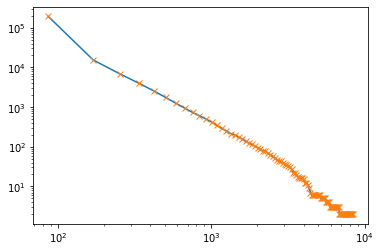

Calculating best minimal value for power law fit


Alpha: 2.883842941682024


In [12]:
import pandas as pd
import numpy as np
import json, math, powerlaw
import matplotlib.pyplot as plt


path = "../yelp_dataset"

df_business = pd.read_json(path+'/business.json', lines=True)

rc = df_business['review_count'].to_numpy()
counts, bins = np.histogram(rc, bins=100)
bins = bins[1:]
counts2 = counts[::-1]
counts2 = np.cumsum(counts2)
counts2 = counts2[::-1]

plt.figure()
plt.plot(bins, counts2)
plt.loglog(bins, counts2, 'x')
plt.show()

results = powerlaw.Fit(rc)
print(f'Alpha: {results.power_law.alpha}')



The data seems to follow a power-law distribution.

# Q2

In [3]:
import pandas as pd
import numpy as np
import json
import scipy.stats as stats

path = "../yelp_dataset"

df_business = pd.read_json(path+'/business.json', lines=True)
review_counts_IL = df_business[df_business['state'] == 'IL']['review_count'].to_numpy()
review_counts_SC = df_business[df_business['state'] == 'SC']['review_count'].to_numpy()

# Kolmogorov-Smirnov

t_stat, p_value = stats.ks_2samp(review_counts_IL, review_counts_SC)
print(f't-stat: {t_stat} \t p-value: {p_value}')

t-stat: 0.07573773354286711 	 p-value: 0.00045265484665102385


To find if the distributions are the same, we made an array of the review_counts of each state, respectively, then used SciPy's built in Kolmogorov-Smirnov test function to calculate a t-statistic and p-value. Because the p-value is less than 0.05, we reject the null hypothesis and conclude that the distributions are NOT the same.

# Q3

In [7]:
import pandas as pd
import numpy as np
import json
import scipy.stats as stats

path = "../yelp_dataset"

df_business = pd.read_json(path+'/business.json', lines=True)

IL_counts = df_business[df_business['state']=='IL']['review_count'].to_numpy()
AZ_counts = df_business[df_business['state']=='AZ']['review_count'].to_numpy()
ON_counts = df_business[df_business['state']=='ON']['review_count'].to_numpy()

t_stat1, p_value1 = stats.ttest_ind(IL_counts, AZ_counts, equal_var=False)
# print(t_stat1)
print(f'Part 1 p-value: {p_value1}\n')

t_stat2, p_value2 = stats.ttest_ind(IL_counts, ON_counts, equal_var=False)
# print(t_stat2)
print(f'Part 1 p-value: {p_value2}\n')



Part 1 p-value: 2.2765973643715597e-39

Part 1 p-value: 0.1314223880540059



We used an indendent two-sample t-test to find if the distributions had the same mean.

For 1), our p-value was very small (< 0.01), so we reject the null hypothesis and conclude that the distribution means are NOT the same.

For 2), our p-value was 0.131 > 0.05, so we fail to reject the null hypothesis, providing evidence that the distribution means are in fact the same.

# Q4

In [8]:
import pandas as pd
import numpy as np
import json
import scipy.stats as stats
import statsmodels.api as sm

path = "../yelp_dataset"

df_business = pd.read_json(path+'/business.json', lines=True)

is_open = df_business['is_open'].to_numpy()
review_count = np.where(df_business['review_count'].to_numpy() > 20, 1, 0)

data = np.concatenate((np.reshape(is_open, (-1,1)), np.reshape(review_count, (-1,1))), axis=1)
contingency_table = sm.stats.Table.from_data(data)

t_stat, p_value, _, _ = stats.chi2_contingency(contingency_table.table_orig)
print(f'Part 1 p-value: {p_value}\n')
      
stars = np.where(df_business['stars'].to_numpy() > 2.5, 1, 0)
data2 = np.concatenate((np.reshape(is_open, (-1,1)), np.reshape(stars, (-1,1))), axis=1)
contingency_table2 = sm.stats.Table.from_data(data2)

t_stat2, p_value2, _, _ = stats.chi2_contingency(contingency_table2.table_orig)
print(f'Part 2 p-value: {p_value2}\n')

Part 1 p-value: 4.611248549446881e-59

Part 2 p-value: 0.026472344905112764



For both parts, we made a contingency table relating the two statistics. We then used SciPy's built-in chi-square independence test to see whether they are independent of one another.

For 1), our p-value was very small (< 0.01), so we reject the null hypothesis (that the statistics are independent) and conclude that a business being open or closed and whether a business has more than 20 reviews are NOT independent.

For 2), our p-value was 0.026 < 0.05, so we again reject the null hypothesis and conclude that a business being open or closed and whether a business has more than 2.5 stars are NOT indepedent.

# Q5

In [9]:
import pandas as pd
import numpy as np
import json
import scipy.stats as stats

path = "../yelp_dataset"

df_user = pd.read_json(path+'/user.json', lines=True)
# reviews and fans
reviews = df_user['review_count'].to_numpy()
fans = df_user['fans'].to_numpy()
r1, _ = stats.pearsonr(reviews, fans)
c1, _ = stats.spearmanr(reviews, fans)


# useful and funny
useful = df_user['useful'].to_numpy()
funny = df_user['funny'].to_numpy()
r2, _ = stats.pearsonr(useful, funny)
c2, _ = stats.spearmanr(useful, funny)

# useful and fans
r3, _ = stats.pearsonr(useful, fans)
c3, _ = stats.spearmanr(useful, fans)

print(f'1: Pearson: {r1} \t Spearman: {c1}\n')
print(f'2: Pearson: {r2} \t Spearman: {c2}\n')
print(f'3: Pearson: {r3} \t Spearman: {c3}\n')

1: Pearson: 0.5506816309257399 	 Spearman: 0.5386287759112771

2: Pearson: 0.964712907174548 	 Spearman: 0.7813877781869568

3: Pearson: 0.7026543853857049 	 Spearman: 0.5530478606753861



1) Reviews and number of fans has a moderately positively correlated relationship according to the Pearson coefficient. The Spearman coefficient shows a moderate positive rank correlation, meaning it can be described moderately well by a monotonic (linear) function. Thus, we can say that having more reviews means you are moderately more likely to have more fans and vice versa.

2) The number of 'useful' and 'funny' received has a very highly positively correlated relationship according to the Pearson coefficient. The Spearman coefficient shows a high positive rank correlation, meaning it can be described well by a monotonic (linear) function. Thus, we can say that having more 'useful' means you are very highly likely to have more 'funny' and vice versa.

3) The number of 'useful' received and number of fans has a highly correlated relationship according to the Perason coefficient. The Spearman coefficient shows a moderate positive rank correlation, meaning it can be described moderately well by a monotonic (linear) function. Thus, we can say that having more 'useful' means that you are moderately highly likely to have more fans and vice versa.